<a href="https://colab.research.google.com/github/CaioPereira51/analitics-com-python/blob/main/CaioPereira_lista08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>FUMEC - Analytics com Python</font>
## **Lista de exercícios 08 - Regressão**

<br>**ATENÇÃO:** para salvar o arquivo .ipynb do notebook, faça da seguinte forma:

* **Google Colaboratory**: opção do menu "File --> Download .ipynb"

* Salve o arquivo com o nome "**SeuNome_lista08.ipynb**"

<br>



### **Importar o arquivo de dados**:

Importar o arquivo de dados "**dados_portuarios.csv**" para o Google Colab.



In [3]:
import pandas as pd
import numpy as np  #biblioteca necessária para trabalhar com os vetores e matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

### **01) Carregar e preparar o dataset para a regressão**:

Explorar o dataset "**dados_portuarios.csv**" utilizando os recursos da biblioteca Pandas.



In [5]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1zM8H-0Qha-8iI4Q-3tAnCJqZcB6AmpZx')
df.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


Listar o número de linhas e colunas do dataset

In [6]:
num = df.shape

print(num)

(120, 14)


Listar o nome das colunas do dataset

In [7]:
nomes = df.columns

print(nomes)

Index(['valid_import', 'item', 'importer_id', 'exporter_id',
       'country_of_origin', 'declared_quantity', 'declared_cost',
       'mode_of_transport', 'route', 'date_of_departure', 'date_of_arrival',
       'declared_weight', 'actual_weight', 'days_in_transit'],
      dtype='object')


Executar o resumo estatístico do dataset

In [8]:
resumo = df.describe()

print(resumo)

       importer_id  exporter_id  declared_quantity  declared_cost  \
count        120.0        120.0         120.000000     120.000000   
mean         111.0        222.0         127.458333    6743.649881   
std            0.0          0.0          14.641311    2991.797050   
min          111.0        222.0         100.000000    1441.012419   
25%          111.0        222.0         115.750000    4442.903914   
50%          111.0        222.0         131.500000    6010.218745   
75%          111.0        222.0         139.000000    8887.095370   
max          111.0        222.0         149.000000   14281.325362   

       declared_weight  actual_weight  days_in_transit  
count       120.000000     118.000000       120.000000  
mean       1264.702934    1313.789858        35.424705  
std         633.149971     660.023051        26.571591  
min          18.459509      19.275241        12.410325  
25%         820.314400     828.744375        18.225625  
50%        1255.597743    1322.71704

Verificar as informações do dataset com o método info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      118 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


Listar o total de valores nulos (ausentes) em cada coluna

In [10]:
df.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        2
days_in_transit      0
dtype: int64

Excluir as linhas do dataset onde ainda existem valores nulos


In [11]:
df.dropna(inplace=True)

Listar novamente o total de valores nulos de cada coluna

In [12]:
df.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        0
days_in_transit      0
dtype: int64

Verificar se existem **ouliers**, usando o **bloxplot**, para as colunas '**declared_weight**', '**actual_weight**', '**days_in_transit**'

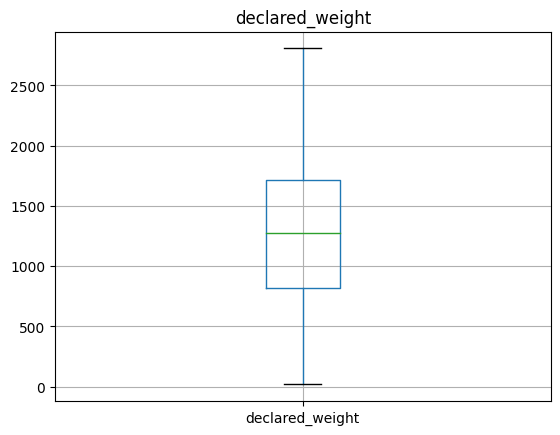

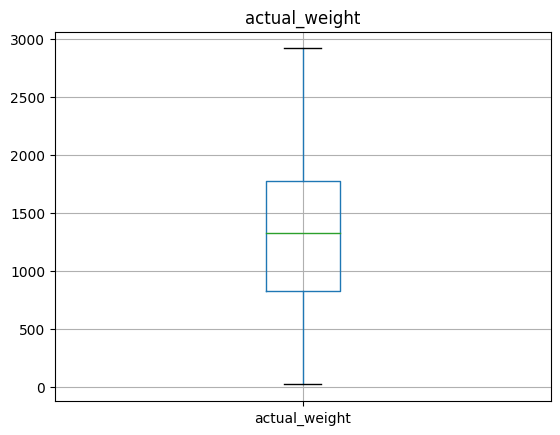

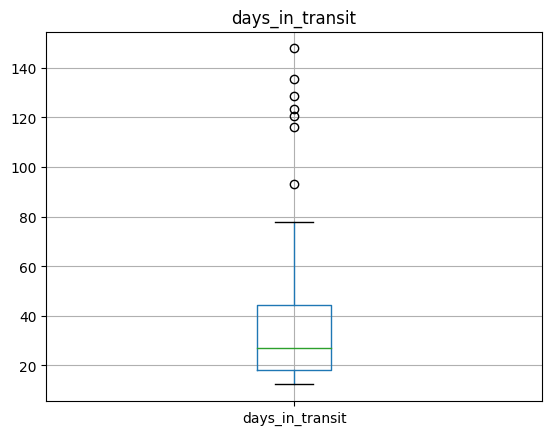

In [13]:
for col in ["declared_weight", "actual_weight", "days_in_transit"]:
  plt.figure()
  df.boxplot(column=col)
  plt.title(col)
  plt.show()

Liste as linhas onde foram encontrados outliers

In [14]:
for col in ["declared_weight", "actual_weight", "days_in_transit"]:
    print(df[col])

0      1608.605135
1       831.719301
2      1527.704165
3      1138.680563
4       761.744581
          ...     
115    1757.322008
116     475.654903
117     130.262964
118      61.572459
119     920.743397
Name: declared_weight, Length: 118, dtype: float64
0      1637.661221
1       848.273419
2      1582.063911
3      1179.993817
4       781.735080
          ...     
115    1827.472780
116     490.562199
117     136.161003
118      63.708666
119     955.979634
Name: actual_weight, Length: 118, dtype: float64
0      18.232857
1      32.436029
2      16.996206
3      19.965886
4      22.160034
         ...    
115    63.817343
116    61.979928
117    50.582027
118    44.787806
119    19.814924
Name: days_in_transit, Length: 118, dtype: float64


Remova as linhas com ouliers

### **02) Realizar a regressão no dataset preparado**:




Selecionando as colunas para a regressão

*   Usar os dados da coluna '**declared_weight**' como variável independente (X)
*   Usar os dados da coluna '**actual_weight**' como variável dependente ou alvo da predição da regressão (y)



Colocar os dados da variável X no formato apropriado para a regressão usando o comando reshape

Plotar um gráfico de dispersão com o pontos das variáveis X e y

Realize a previsão usando a regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression



Exiba a equação da reta encontrada (y = aX + b)

Apresente o coeficiente de determinação (R2)

In [ ]:
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)



Apresente o erro médio quadrático (MSE)



In [ ]:
from sklearn.metrics import mean_squared_error



Plotar a reta da regressão juntamente com os pontos X e y no gráfico de dispersão

Faça a predição dos mesmos dados usando árvore de decisão, apresentando o coeficiente de determinação (R2) e o erro médio quadrático (MSE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor



Plotar a função da regressão da árvore de decisão juntamente com os pontos X e y no gráfico de dispersão